## 2-5. 時間の情報を反映した時系列グラフにしてみよう！🌵（練習問題）

ここでの図化はもともと時系列データだったものを時間の情報を削除して図化してしまっていました。  
一方で、時系列図の作図も可能ですので、ファイルから時間の情報も適切に処理して、時系列図として描画してみましょう！

**Hint!**
時間のデータの扱いは**datetime**というライブラリを用いてみるのがよいでしょう。

In [1]:
### おさらい

import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#matplotlib.use('Agg')

# 全てのデータがNaNならFalseを返すよ！
def is_exist(data):
    num = np.sum(1.0 - np.isnan(data))
    if num == 0.0:
        return False
    else:
        return True

# 指定のディレクトリの中の全てのCSVファイルのパスを返すよ！
def getfiles(root):
    paths = []
    for curDir, dirs, files in os.walk(root):
        if len(files) > 0:
            for file in files:
                paths.append("/".join([curDir,file]))
    return paths

# CSVファイルの中身をNumpy配列に変換して返すよ！
# ただし、日付情報とかは無視しているバージョン。。。
def readcsv(path_of_csv):
    f = open(path_of_csv)
    data_of_csv = f.read()
    data_of_csv = data_of_csv.split("\n") #改行コードで行分割
    head0 = data_of_csv[0]
    head1 = data_of_csv[1]
    body_ = data_of_csv[2:-1]
    body  = []
    for t in body_:
        t = t.split(",")
        body.append( t[1:] )
    f.close()
    body = np.array(body, dtype=float)
    return body

# まとめて描画するよ！
def draw_figures(paths, ny=5, nx=4, figsize=(15,12)):
    fig = plt.figure(figsize=figsize)
    axs = []
    for n,path in enumerate(paths):
        data = readcsv(path)
        if is_exist(data):
            axs.append( fig.add_subplot(ny, nx, n+1) )
            axs[-1].plot(data[:,0], color=  "red", label="column0")
            axs[-1].plot(data[:,1], color="green", label="column1")
            axs[-1].plot(data[:,2], color= "blue", label="column2")
    fig.tight_layout() 
    return plt #plt.show()

# 動作確認
paths = getfiles("_data/01_02_inputs")
for path in paths:
    data = readcsv(path)
    if is_exist(data):
        print(path, os.path.exists(path), data.shape, data[0,0], type(data[0,0]))
        break

_data/01_02_inputs\2011.04.10送付/2011-04-06.csv True (24, 3) -1.0389010262617242 <class 'numpy.float64'>


In [2]:
### 日付情報をキャッチして出力してみよう！

import datetime

def getdatetime(sdate, stime):
    stime = stime.split(":")
    return datetime.datetime(year=int(sdate[0]),month=int(sdate[1]),day=int(sdate[2]),
                              hour=int(stime[0]),minute=int(stime[1]),second=int(stime[2]))

def readcsv_with_timeseries(path_of_csv):
    f = open(path_of_csv)
    data_of_csv = f.read()
    data_of_csv = data_of_csv.split("\n") #改行コードで行分割
    head0 = data_of_csv[0]
    head1 = data_of_csv[1]
    body_ = data_of_csv[2:-1]
    body  = []

    time  = []
    sdate = head0.split("/")

    for t in body_:
        t = t.split(",")
        time.append( getdatetime(sdate, t[0]) )
        body.append( t[1:] )
        #print(time[-1], type(time[-1]))
    f.close()
    body = np.array(body, dtype=float)
    time = np.array(time)
    return time,body

for path in paths:
    time,data = readcsv_with_timeseries(path)
    if is_exist(data):
        print(path, os.path.exists(path))
        break

_data/01_02_inputs\2011.04.10送付/2011-04-06.csv True


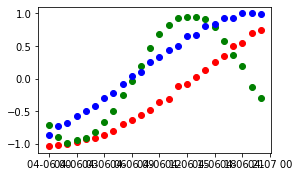

In [3]:
def draw_figures(paths, ny=5, nx=4, figsize=(15,12)):
    fig = plt.figure(figsize=figsize)
    axs = []
    for n,path in enumerate(paths):
        time,data = readcsv_with_timeseries(path) ###
        if is_exist(data):
            axs.append( fig.add_subplot(ny, nx, n+1) )
            axs[-1].scatter(time,data[:,0], color=  "red", label="column0")
            axs[-1].scatter(time,data[:,1], color="green", label="column1")
            axs[-1].scatter(time,data[:,2], color= "blue", label="column2")
            break
    fig.tight_layout()
    plt.show()

paths = getfiles("_data/01_02_inputs")
draw_figures(paths)

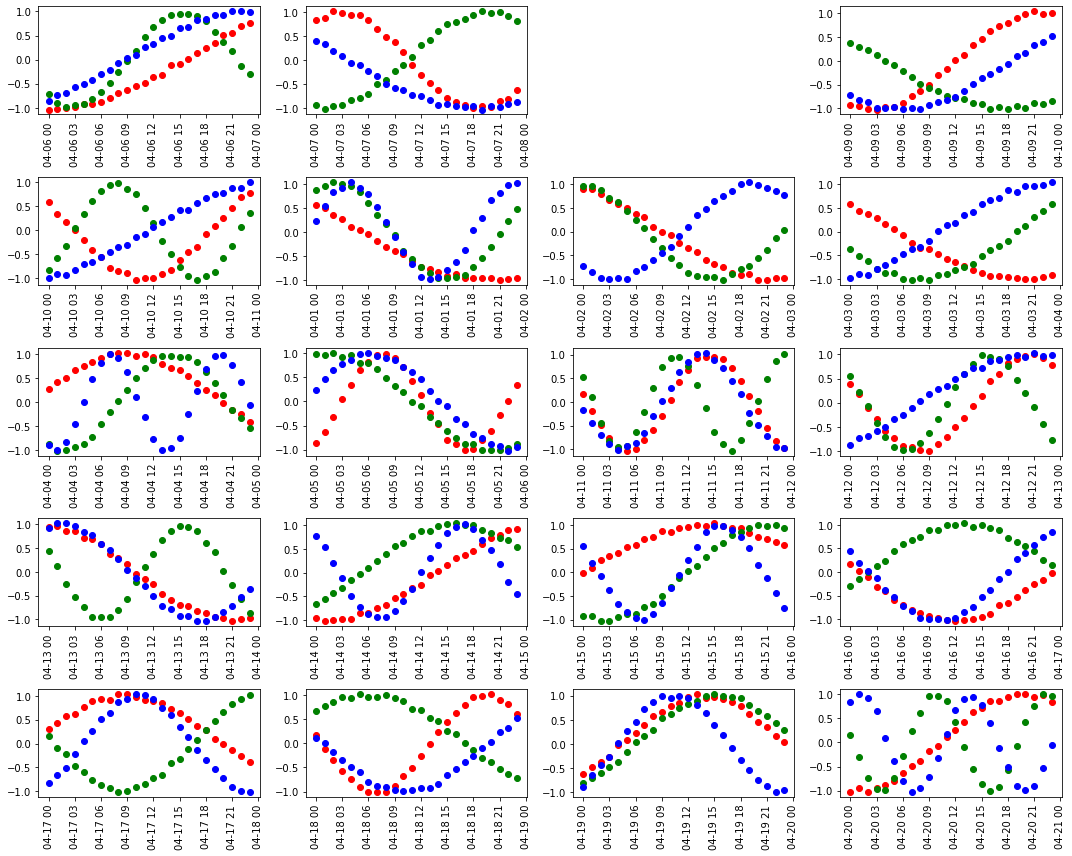

In [4]:
### 時間がつぶれてしまって読みずらいので…

def draw_figures(paths, ny=5, nx=4, figsize=(15,12)):
    fig = plt.figure(figsize=figsize)
    axs = []
    for n,path in enumerate(paths):
        time,data = readcsv_with_timeseries(path) ###
        if is_exist(data):
            axs.append( fig.add_subplot(ny, nx, n+1) )
            axs[-1].scatter(time,data[:,0], color=  "red", label="column0")
            axs[-1].scatter(time,data[:,1], color="green", label="column1")
            axs[-1].scatter(time,data[:,2], color= "blue", label="column2")
            plt.xticks(rotation=90) ###
            #break
    fig.tight_layout()
    plt.show()

paths = getfiles("_data/01_02_inputs")
draw_figures(paths)

装飾関係は省略します。